In [ ]:
# Example without hidden layer
# create model class

import torch
import torch.nn as nn

class Model(nn.Module):   # class "Model" needs to be inherit from "nn.Module" class in order to use the functionalities of "nn" class
    def __init__(self,num_features):

        super().__init__()  # Calls the constructor of "nn.Module" (nn.Module.__init__())
        self.linear = nn.Linear(num_features,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,features):
        out = self.linear(features)   # z = wx+b (z = out)
        out = self.sigmoid(out)
        return out



In [ ]:
## create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1])

# call model for forward pass
model(features)

tensor([[0.6141],
        [0.6454],
        [0.5786],
        [0.6310],
        [0.6863],
        [0.6539],
        [0.6403],
        [0.5608],
        [0.7108],
        [0.6302]], grad_fn=<SigmoidBackward0>)

In [ ]:
# Show model weights

model.linear.weight
# model.linear.bias

Parameter containing:
tensor([[ 0.2400,  0.1859,  0.2744, -0.3120,  0.1520]], requires_grad=True)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model,input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## Example using hidden layer

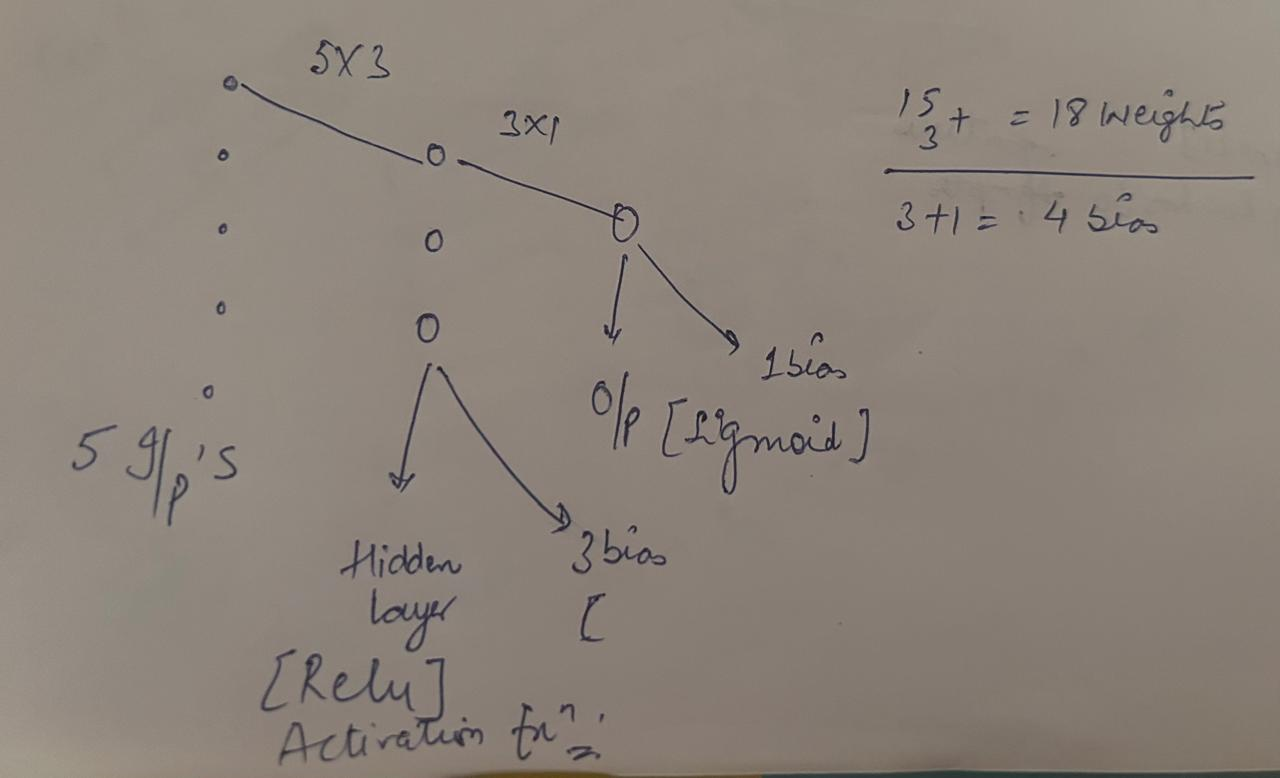

In [ ]:
# ********

import torch
import torch.nn as nn

class Model(nn.Module):

    def __init__(self,num_features):
        super().__init__()
        self.linear1 = nn.Linear(num_features, 3)  #basically this is hidden layer-- I/P_features->>5 and O/P->> 3
        self.relu = nn.ReLU()  # this is activation fxn. of hidden layer

        self.linear2 = nn.Linear(3,1)  # basically this is O/P layer
        self.sigmoid = nn.Sigmoid()  # this is activation fxn of O/P layer

    def forward(self,features):
        out = self.linear1(features)
        out = self.relu(out)

        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
# create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1])

# call model for forward pass
model(features)

tensor([[0.6241],
        [0.6380],
        [0.6369],
        [0.6054],
        [0.6093],
        [0.6104],
        [0.6869],
        [0.5976],
        [0.6722],
        [0.6434]], grad_fn=<SigmoidBackward0>)

In [ ]:
# show model weights
print(model.linear1.weight)
print(model.linear2.weight)

Parameter containing:
tensor([[ 0.4103, -0.4342,  0.3489, -0.2354,  0.1810],
        [ 0.0824, -0.0017, -0.0472,  0.3610,  0.3865],
        [ 0.4058, -0.0501,  0.4249,  0.3436,  0.3340]], requires_grad=True)
Parameter containing:
tensor([[ 0.2238, -0.2973,  0.4898]], requires_grad=True)


In [ ]:
print(model.linear1.bias)
print(model.linear2.bias)

Parameter containing:
tensor([ 0.1307, -0.0778, -0.2152], requires_grad=True)
Parameter containing:
tensor([0.3239], requires_grad=True)


In [ ]:
from torchinfo import summary

summary(model,input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### What Is `nn.Sequential`?
#### `nn.Sequential` is a container where you can stack layers in order — one after another — without manually writing self.layer1, self.layer2, etc.



In [ ]:
# Let’s First Recall Your Original Model:

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(num_features, 3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear1(features)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# Let’s Rewrite Using nn.Sequential

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, features):
        out = self.network(features)
        return out

